In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta

# Data preparation

In [3]:
df = pd.read_csv('../datasets/netflix_stock_history.csv', parse_dates=["Date"]) # Load dataset with date parsing - Converts 'Date' column to datetime instead of string
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Display basic dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          4870 non-null   datetime64[ns]
 1   open          4870 non-null   float64       
 2   high          4870 non-null   float64       
 3   low           4870 non-null   float64       
 4   close         4870 non-null   float64       
 5   volume        4870 non-null   int64         
 6   dividends     4870 non-null   int64         
 7   stock_splits  4870 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 304.5 KB


In [4]:
# Display the first few rows
print("First 5 Rows:")
print(df.head())

First 5 Rows:
        date      open      high       low     close     volume  dividends  \
0 2002-05-23  1.156429  1.242857  1.145714  1.196429  104790000          0   
1 2002-05-24  1.214286  1.225000  1.197143  1.210000   11104800          0   
2 2002-05-28  1.213571  1.232143  1.157143  1.157143    6609400          0   
3 2002-05-29  1.164286  1.164286  1.085714  1.103571    6757800          0   
4 2002-05-30  1.107857  1.107857  1.071429  1.071429   10154200          0   

   stock_splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
# Summary statistics of stock prices
print("Statistic Values:")
df.describe()

Missing Values:
date            0
open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64
Statistic Values:


,date,open,high,low,close,volume,dividends,stock_splits
count,4870,4870.000000,4870.000000,4870.000000,4870.000000,4.870000e+03,4870.0,4870.000000
mean,2012-01-23 12:36:57.659137792,104.243285,105.833669,102.608072,104.282593,1.682662e+07,0.0,0.001848
min,2002-05-23 00:00:00,0.377857,0.410714,0.346429,0.372857,2.856000e+05,0.0,0.000000
25%,2007-03-26 06:00:00,3.898214,3.975000,3.833214,3.902500,6.309850e+06,0.0,0.000000
50%,2012-01-23 12:00:00,21.144286,21.406429,20.743572,21.004285,1.085175e+07,0.0,0.000000
75%,2016-11-21 18:00:00,124.975002,126.427502,122.847502,124.797503,2.018555e+07,0.0,0.000000
max,2021-09-24 00:00:00,606.469971,615.599976,596.549988,606.710022,3.234140e+08,0.0,7.000000
std,NaN,155.319234,157.589034,152.978074,155.365529,1.938116e+07,0.0,0.104316


In [6]:
df['dividends'].unique()

array([0])

In [7]:
# Drop 'Dividends' since all are 0s
df = df.drop('dividends', axis=1)

## Stock Price Trends Over Time

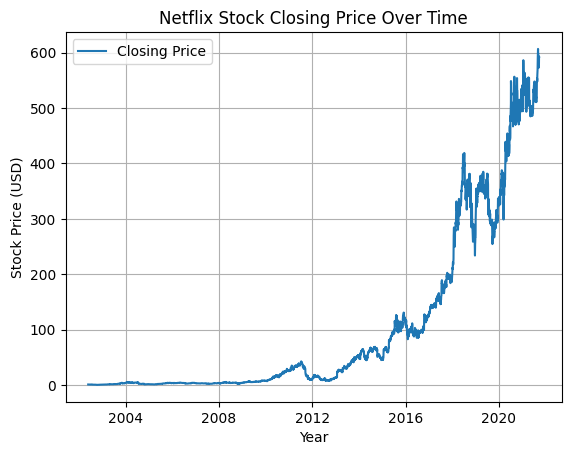

In [8]:
plt.plot(df["date"], df["close"], label="Closing Price")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Netflix Stock Closing Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Trading Volume Trends

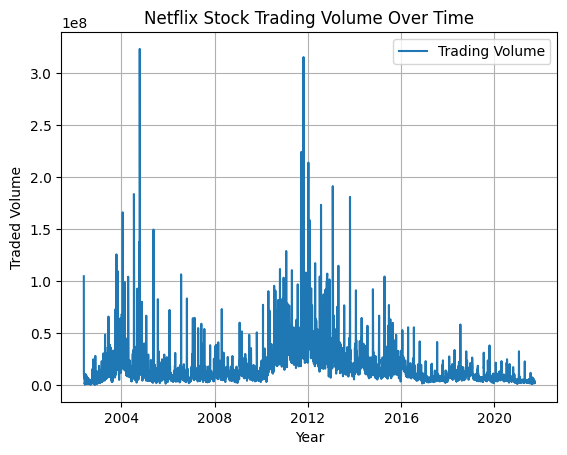

In [9]:
plt.plot(df["date"], df["volume"], label="Trading Volume")
plt.xlabel("Year")
plt.ylabel("Traded Volume")
plt.title("Netflix Stock Trading Volume Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Stock Price with Splits

In [10]:
df_splits = df[df["stock_splits"] > 0]

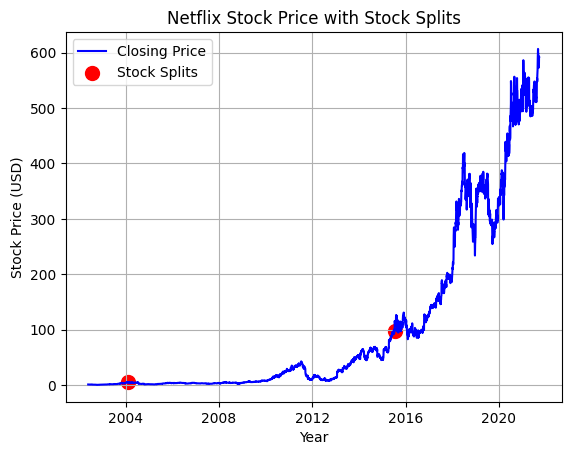

In [11]:
plt.plot(df["date"], df["close"], label="Closing Price", color="blue")
plt.scatter(df_splits["date"], df_splits["close"], color="red", label="Stock Splits", marker="o",s=100)
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Netflix Stock Price with Stock Splits")
plt.legend()
plt.grid(True)
plt.show()

## Bollinger Bands shows market fluctuations.

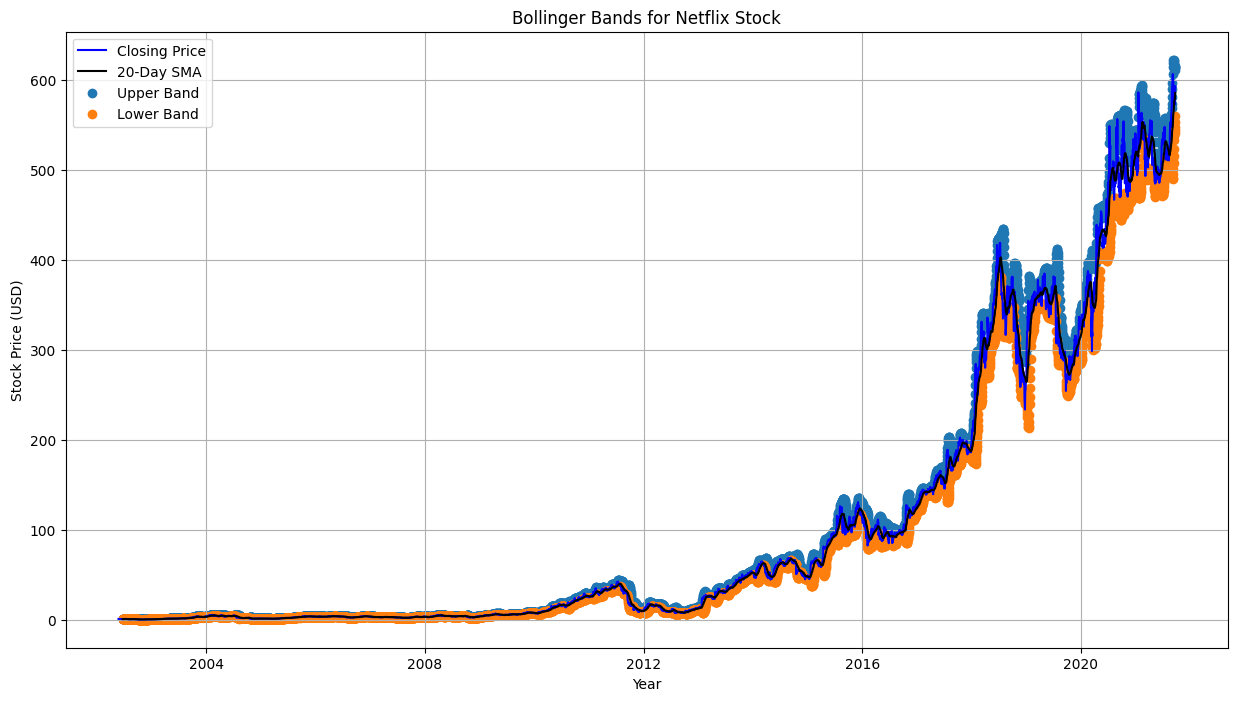

In [12]:
df["sma_20"] = df["close"].rolling(window=20).mean()
df["upper_band"] = df["sma_20"] + (df["close"].rolling(window=20).std() * 2)
df["lower_band"] = df["sma_20"] - (df["close"].rolling(window=20).std() * 2)

plt.figure(figsize=(15, 8))
plt.plot(df["date"], df["close"], label="Closing Price", color="blue")
plt.plot(df["date"], df["sma_20"], label="20-Day SMA", color="black")
plt.scatter(df["date"], df["upper_band"], label="Upper Band")
plt.scatter(df["date"], df["lower_band"], label="Lower Band")
plt.xlabel("Year")
plt.ylabel("Stock Price (USD)")
plt.title("Bollinger Bands for Netflix Stock")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# 2.1 Moving Averages (MA)
# Simple Moving Average (SMA)
df['sma_5'] = ta.sma(df['close'], length=5)
df['sma_20'] = ta.sma(df['close'], length=20)
df['sma_50'] = ta.sma(df['close'], length=50)

# Exponential Moving Average (EMA)
df['ema_12'] = ta.ema(df['close'], length=12)
df['ema_26'] = ta.ema(df['close'], length=26)

# 2.2 Relative Strength Index (RSI)
df['rsi'] = ta.rsi(df['close'], length=14) # Default 14-day period

# Remove rows with NaN values (start of the series where MA/RSI can't be calculated)
df.dropna(inplace=True)



#

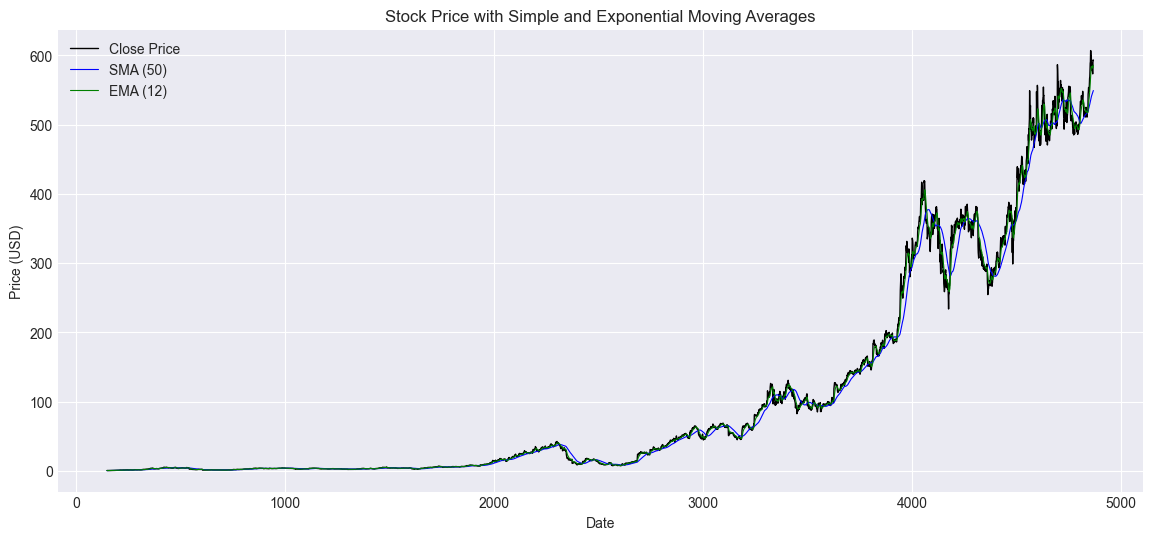

In [23]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['close'], label='Close Price', color='black', linewidth=1.0)
#plt.plot(df.index, df['sma_20'], label='SMA (20)', color='red', linewidth=1.0)
plt.plot(df.index, df['sma_50'], label='SMA (50)', color='blue',linewidth=0.8)
plt.plot(df.index, df['ema_12'], label='EMA (12)', color='green',linewidth=0.8)
plt.ylabel('Price (USD)')
plt.title('Stock Price with Simple and Exponential Moving Averages')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

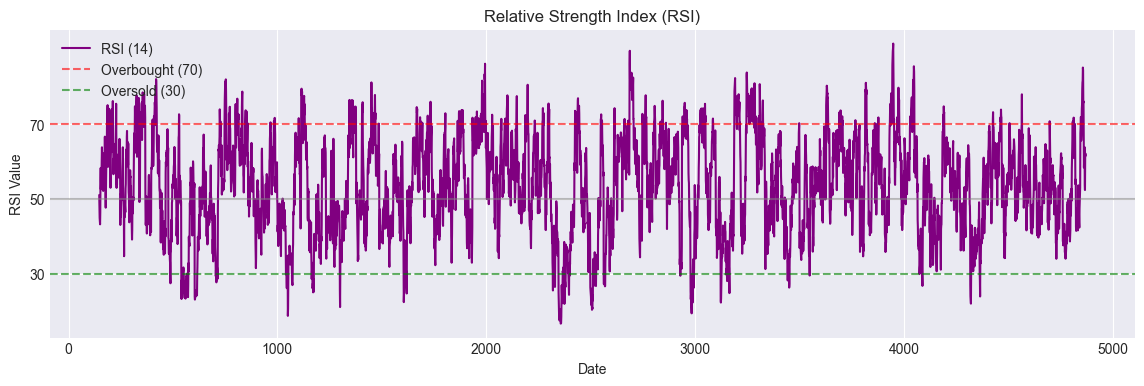

In [18]:
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['rsi'], label='RSI (14)', color='purple', linewidth=1.5)
plt.axhline(70, color='red', linestyle='--', alpha=0.6, label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', alpha=0.6, label='Oversold (30)')
plt.axhline(50, color='gray', linestyle='-', alpha=0.5)
plt.ylabel('RSI Value')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.yticks([30, 50, 70])
plt.legend(loc='upper left')
plt.grid(True)
plt.show()